<a href="https://colab.research.google.com/github/RoalcoAC/Algoritmos/blob/main/Laboratorio_3_algortimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
### Generar dataset
def Generate(n,d):
    np.random.seed(10)
    A = np.random.normal(0,1,size = (n,d))
    x_true = np.random.normal(0,1, size =(d,1))
    b = np.dot(A,x_true) + np.random.normal(0,0.5,size = (n,1))
    return A,b,x_true
### función objetivo
def f(x,A,b):
    return np.sum((np.dot(A,x)-b)**2)
### Solución exacta
def Exact_Solution(A,b):
    solution = np.dot(np.matmul(np.linalg.inv(np.matmul(np.transpose(A),A)),np.transpose(A)),b)
    obj_func = f(solution,A,b)
    return solution, obj_func
### Gradiente de la función objetivo
def grad(A,b,x):
  gradi = np.dot(np.transpose(A),(np.dot(A,x)-b))
  return gradi
### Solución grad desc
def GD(A,b,lr,max_iter):
  x = np.zeros(A.shape[1])
  x = x.reshape(-1,1)
  loss = []
  iter = []
  for i in range(max_iter):
    iter.append(i)
    x = x - lr*grad(A,b,x)
    lossi = f(x,A,b)
    loss.append(lossi)
#  sns.set_style("whitegrid")
#  plt.title('Función de pérdidas para método GD convencional')
#  plt.xlabel('iteración')
#  plt.ylabel('loss')
#  sns.lineplot(x = iter, y = loss, color = 'darkred')
  return x, loss,iter
### Gradiente estocástico
def SGD(A,b,lr,max_iter):
  x = np.zeros(A.shape[1]).reshape(-1,1)
  loss = []
  iter = []
  for i in range(max_iter):
    rand = random.randint(0,len(A)-1)
    x = x - lr*grad(A[rand].reshape(1,-1),b[rand],x)
    lossi = f(x,A,b)
    loss.append(lossi)
    iter.append(i)
#  sns.set_style("whitegrid")
#  plt.title('Función de pérdidas para método GD estocástico')
#  plt.xlabel('iteración')
#  plt.ylabel('loss')
#  sns.lineplot(x = iter, y = loss, color = 'pink')
  return x, loss, iter

### Gradiente MiniBatch
def MBGD(A,b,lr,max_iter,bs):
  x = np.zeros(A.shape[1]).reshape(-1,1)
  loss = []
  iter = []
  batch_size = bs
  batches = int(len(b)/batch_size)
  for i in range (max_iter):
    for j in range(batches-1):
      x = x - lr*grad(A[(j*batch_size):(j*batch_size + 1)],b[(j*batch_size):(j*batch_size + 1)],x)
    loss.append(f(x,A,b))
    iter.append(i)
  #sns.set_style("whitegrid")
  #plt.title('Función de pérdidas para método mini-batch')
  #plt.xlabel('iteración')
  #plt.ylabel('loss')
  #sns.lineplot(x = iter, y = loss, color = 'darkgreen')
  return x,loss,iter
A,b,x_true = Generate(100,4)
betas, error = Exact_Solution(A,b)
x,loss,iter = MBGD(A,b,0.005,1000,10)
x
betas
x,loss,iter = SGD(A,b,0.005,1000)
x
x, loss, iter = GD(A,b,0.005,1000)

In [15]:
import numpy as np
import random

# Generar datos simulados
def generate_data(n, d):
    np.random.seed(10)
    A = np.random.normal(0, 1, size=(n, d))
    true_coefficients = np.random.normal(0, 1, size=(d, 1))
    b = np.dot(A, true_coefficients) + np.random.normal(0, 0.5, size=(n, 1))
    return A, b, true_coefficients

# Función objetivo: Suma de los errores cuadrados
def objective_function(x, A, b):
    return np.sum((np.dot(A, x) - b) ** 2)

# Solución exacta utilizando mínimos cuadrados
def exact_solution(A, b):
    solution = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b))
    obj_func_value = objective_function(solution, A, b)
    return solution, obj_func_value

# Gradiente de la función objetivo
def gradient(A, b, x):
    return 2 * np.dot(A.T, np.dot(A, x) - b)

# Algoritmo de Descenso de Gradiente (GD)
def gradient_descent(A, b, learning_rate, max_iterations):
    x = np.zeros((A.shape[1], 1))
    loss_values = []

    for i in range(max_iterations):
        gradient_x = gradient(A, b, x)
        x -= learning_rate * gradient_x
        loss = objective_function(x, A, b)
        loss_values.append(loss)

    return x, loss_values

def stochastic_gradient_descent(A, b, learning_rate, max_iterations):
    x = np.zeros((A.shape[1], 1))
    loss_values = []

    for i in range(max_iterations):
        random_index = random.randint(0, len(A) - 1)
        gradient_x = gradient(A[random_index].reshape(1, -1), b[random_index], x)
        x -= learning_rate * gradient_x
        loss = objective_function(x, A, b)
        loss_values.append(loss)

    return x, loss_values


# Algoritmo de Mini-Batch Gradient Descent (MBGD)
def mini_batch_gradient_descent(A, b, learning_rate, max_iterations, batch_size):
    x = np.zeros((A.shape[1], 1))
    loss_values = []

    for i in range(max_iterations):
        for j in range(0, len(A), batch_size):
            batch_A = A[j:j + batch_size]
            batch_b = b[j:j + batch_size]
            gradient_x = gradient(batch_A, batch_b, x)
            x -= learning_rate * gradient_x
            loss = objective_function(x, A, b)
            loss_values.append(loss)

    return x, loss_values

# Generar datos y ejecutar los algoritmos
A, b, true_coefficients = generate_data(100, 4)

# Solución exacta
exact_solution_coeffs, exact_solution_loss = exact_solution(A, b)
print("Solución exacta (coeficientes):")
print(exact_solution_coeffs)
print("Valor de la función objetivo para la solución exacta:")
print(exact_solution_loss)

# Descenso de gradiente (GD)
gd_solution, gd_loss = gradient_descent(A, b, 0.005, 1000)

# Descenso de gradiente estocástico (SGD)
sgd_solution, sgd_loss = stochastic_gradient_descent(A, b, 0.005, 1000)

# Mini-Batch Gradient Descent (MBGD)
mbgd_solution, mbgd_loss = mini_batch_gradient_descent(A, b, 0.005, 1000, 10)

# Imprimir las soluciones obtenidas por los algoritmos
print("Solución GD (coeficientes):")
print(gd_solution)
print("Solución SGD (coeficientes):")
print(sgd_solution)
print("Solución MBGD (coeficientes):")
print(mbgd_solution)


Solución exacta (coeficientes):
[[ 0.49238165]
 [-1.21790483]
 [ 0.25725508]
 [ 0.3909045 ]]
Valor de la función objetivo para la solución exacta:
21.292706223706872
Solución GD (coeficientes):
[[ 0.49238165]
 [-1.21790483]
 [ 0.25725508]
 [ 0.3909045 ]]
Solución SGD (coeficientes):
[[ 0.43308945]
 [-1.16781391]
 [ 0.28493842]
 [ 0.35481328]]
Solución MBGD (coeficientes):
[[ 0.49047633]
 [-1.21676639]
 [ 0.26000603]
 [ 0.39456433]]


In [16]:
betas, error = Exact_Solution(A,b)
print(betas)

[[ 0.49238165]
 [-1.21790483]
 [ 0.25725508]
 [ 0.3909045 ]]


In [ ]:
# Parte 2

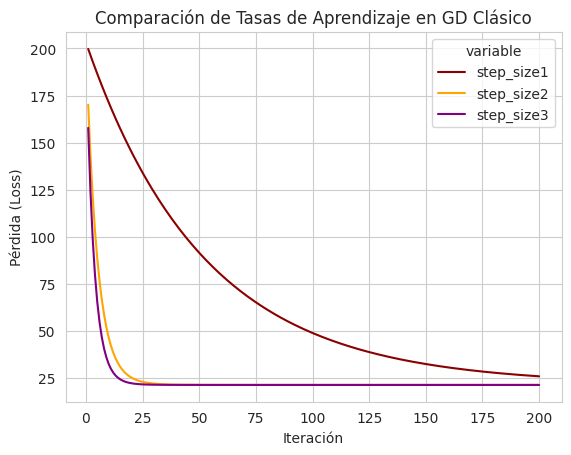

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para comparar tasas de aprendizaje en GD clásico
def compare_learning_rates(A, b, step1, step2, step3, max_iter):
    # Ejecutar GD con las tres tasas de aprendizaje y rastrear la pérdida y las iteraciones
    x1, loss1 = gradient_descent(A, b, step1, max_iter)
    x2, loss2 = gradient_descent(A, b, step2, max_iter)
    x3, loss3 = gradient_descent(A, b, step3, max_iter)

    # Crear un DataFrame para visualizar los resultados
    data = {
        'iteración': list(range(1, max_iter + 1)),
        'step_size1': loss1,
        'step_size2': loss2,
        'step_size3': loss3
    }
    data = pd.DataFrame(data)

    # Configurar el estilo y crear una gráfica para comparar las tasas de aprendizaje
    sns.set_style('whitegrid')
    plt.title('Comparación de Tasas de Aprendizaje en GD Clásico')
    plt.xlabel('Iteración')
    plt.ylabel('Pérdida (Loss)')

    # Utilizar seaborn para mostrar las curvas de pérdida para las tres tasas de aprendizaje
    sns.lineplot(x='iteración', y='value', hue='variable', data=pd.melt(data, ['iteración']), palette=['darkred', 'orange', 'purple'])

# Llamar a la función con las tasas de aprendizaje y otros parámetros
compare_learning_rates(A, b, 5E-5, 5E-4, 7E-4, 200)


In [ ]:
# Parte 3

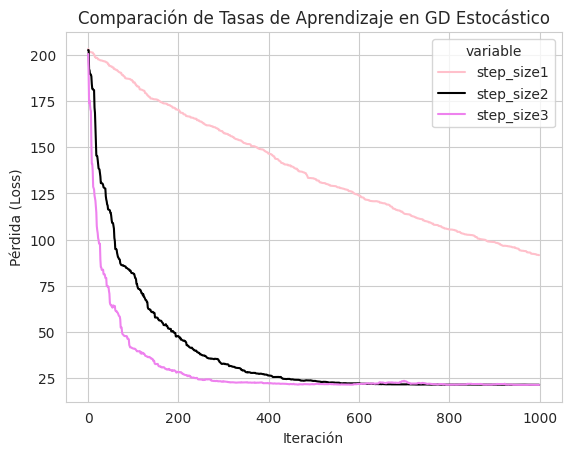

In [22]:
def problema_3(A, b, step1, step2, step3, max_iter):
    # Ejecutar GD estocástico con las tres tasas de aprendizaje y rastrear la pérdida y las iteraciones
    x1, loss1, iter1 = SGD(A, b, step1, max_iter)
    x2, loss2, iter2 = SGD(A, b, step2, max_iter)
    x3, loss3, iter3 = SGD(A, b, step3, max_iter)

    # Crear un DataFrame para visualizar los resultados
    data = {
        'iteración': iter1,
        'step_size1': loss1,
        'step_size2': loss2,
        'step_size3': loss3
    }
    data = pd.DataFrame(data)

    # Configurar el estilo y crear una gráfica para comparar las tasas de aprendizaje
    sns.set_style('whitegrid')
    plt.title('Comparación de Tasas de Aprendizaje en GD Estocástico')
    plt.xlabel('Iteración')
    plt.ylabel('Pérdida (Loss)')

    # Utilizar seaborn para mostrar las curvas de pérdida para las tres tasas de aprendizaje
    sns.lineplot(x='iteración', y='value', hue='variable', data=pd.melt(data, ['iteración']),
                 palette=['pink', 'black', 'violet'])

# Llamar a la función con las tasas de aprendizaje y otros parámetros
problema_3(A, b, 5E-4, 5E-3, 0.01, 1000)


In [ ]:
# Parte 4

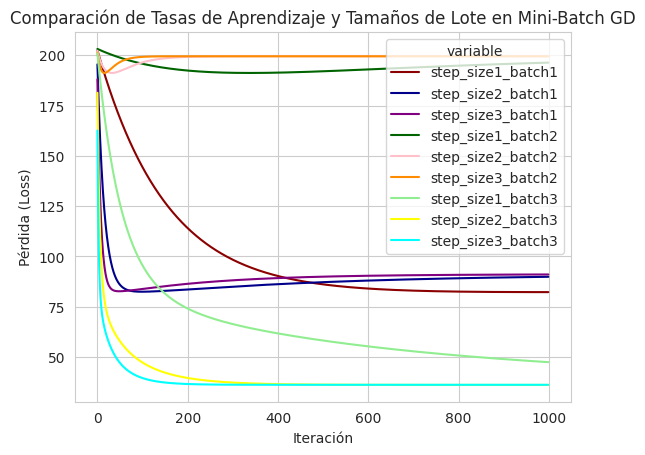

In [23]:
def parte_4(A, b, step1, step2, step3, batch1, batch2, batch3, max_iter):
    # Ejecutar Mini-Batch GD con las tres tasas de aprendizaje y tamaños de lote, y rastrear la pérdida y las iteraciones
    x1, loss1, iter1 = MBGD(A, b, step1, max_iter, batch1)
    x2, loss2, iter2 = MBGD(A, b, step2, max_iter, batch1)
    x3, loss3, iter3 = MBGD(A, b, step3, max_iter, batch1)
    x4, loss4, iter4 = MBGD(A, b, step1, max_iter, batch2)
    x5, loss5, iter5 = MBGD(A, b, step2, max_iter, batch2)
    x6, loss6, iter6 = MBGD(A, b, step3, max_iter, batch2)
    x7, loss7, iter7 = MBGD(A, b, step1, max_iter, batch3)
    x8, loss8, iter8 = MBGD(A, b, step2, max_iter, batch3)
    x9, loss9, iter9 = MBGD(A, b, step3, max_iter, batch3)

    # Crear un DataFrame para visualizar los resultados
    data = {
        'iteración': iter1,
        'step_size1_batch1': loss1,
        'step_size2_batch1': loss2,
        'step_size3_batch1': loss3,
        'step_size1_batch2': loss4,
        'step_size2_batch2': loss5,
        'step_size3_batch2': loss6,
        'step_size1_batch3': loss7,
        'step_size2_batch3': loss8,
        'step_size3_batch3': loss9
    }
    data = pd.DataFrame(data)

    # Configurar el estilo y crear una gráfica para comparar las tasas de aprendizaje y tamaños de lote
    sns.set_style('whitegrid')
    plt.title('Comparación de Tasas de Aprendizaje y Tamaños de Lote en Mini-Batch GD')
    plt.xlabel('Iteración')
    plt.ylabel('Pérdida (Loss)')

    # Utilizar seaborn para mostrar las curvas de pérdida para las tasas de aprendizaje y tamaños de lote
    sns.lineplot(x='iteración', y='value', hue='variable', data=pd.melt(data, ['iteración']),
                 palette=['darkred', 'darkblue', 'purple', 'darkgreen', 'pink', 'darkorange', 'lightgreen', 'yellow', 'cyan'])

# Llamar a la función con las tasas de aprendizaje y tamaños de lote
parte_4(A, b, 5E-4, 5E-3, 0.01, 25, 50, 10, 1000)


In [ ]:
# Problema 2

In [25]:
### Función del problema 2 con variables renombradas
def f(x, y):
    return 100*(y - x**2)**2 + (1 - x)**2

### Gradiente de la función del problema 2 con variables renombradas
def gradient(x, y):
    df_dx = -400*x*(y - x**2) - 2*(1 - x)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy]).reshape(-1, 1)

### Hessiana de la función del problema 2 con variables renombradas
def hessian(x, y):
    df_dx_dx = -400*(y - x**2) + 800*x**2 + 2
    df_dx_dy = -400*x
    df_dy_dx = -400*x
    df_dy_dy = 200
    return np.array([[df_dx_dx, df_dx_dy], [df_dy_dx, df_dy_dy]])


In [ ]:
#

In [31]:
import numpy as np
import pandas as pd

def gradient_descent_backtracking(function, gradient, initial_position, learning_rate, max_iterations, use_backtracking, backtracking_factor):
    position = np.array(initial_position)
    position = position.reshape(-1, 1)
    losses = []
    iterations = []
    learning_rates = []
    positions = []  # Lista para almacenar todas las posiciones
    for i in range(max_iterations):
        learning_rates.append(learning_rate)
        loss = function(position[0][0], position[1][0])  # Corregir acceso a los valores escalares
        losses.append(loss)
        gradient_vector = gradient(position[0][0], position[1][0])  # Corregir acceso a los valores escalares
        position_new = position - learning_rate * gradient_vector
        if use_backtracking:
            while function(position_new[0][0], position_new[1][0]) > loss - 0.5 * learning_rate * np.sum(gradient_vector**2):
                learning_rate *= backtracking_factor
                position_new = position - learning_rate * gradient_vector
        position = position_new
        positions.append(position)  # Almacenar la posición actual
        iterations.append(i)
    data = {
        'iterations': iterations,
        'position_x': [p[0][0] for p in positions],  # Acceder a los valores escalares en cada posición
        'position_y': [p[1][0] for p in positions],  # Acceder a los valores escalares en cada posición
        'learning_rate': learning_rates,
        'loss': losses
    }
    data = pd.DataFrame(data)
    return data

def f(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

def gradient(x, y):
    df_dx = -400 * x * (y - x**2) - 2 * (1 - x)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy]).reshape(-1, 1)

result = gradient_descent_backtracking(f, gradient, [0, 0], 1, 15000, True, 0.3)


In [ ]:
# Newton con Backtracking Line Search

In [34]:
import numpy as np
import pandas as pd

def newton_method(objective_function, gradient, hessian, initial_position, learning_rate, max_iterations, use_backtracking, backtracking_factor):
    position = np.array(initial_position).reshape(-1, 1)
    losses = []
    iterations = []
    learning_rates = []
    positions = []  # Lista para almacenar todas las posiciones
    for i in range(max_iterations):
        learning_rates.append(learning_rate)
        gradient_vector = gradient(position[0][0], position[1][0])
        hessian_matrix = hessian(position[0][0], position[1][0])
        position_new = position - np.dot(np.linalg.inv(hessian_matrix), gradient_vector)
        if use_backtracking:
            while objective_function(position_new[0][0], position_new[1][0]) > objective_function(position[0][0], position[1][0]) - 0.5 * learning_rate * np.dot(gradient_vector.transpose(), np.dot(np.linalg.inv(hessian_matrix), gradient_vector)):
                learning_rate *= backtracking_factor
                position_new = position - learning_rate * gradient_vector
        position = position_new
        positions.append(position)  # Almacenar la posición actual
        loss = objective_function(position[0][0], position[1][0])
        losses.append(loss)
        iterations.append(i)
    data = {
        'iterations': iterations,
        'position': positions,
        'gradient': [gradient(p[0][0], p[1][0]) for p in positions],
        'learning_rate': learning_rates,
        'loss': losses
    }
    data = pd.DataFrame(data)
    return data

# Define la función objetivo
def objective_function(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

# Define el gradiente de la función objetivo
def gradient(x, y):
    df_dx = -400 * x * (y - x**2) - 2 * (1 - x)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy]).reshape(-1, 1)

# Define la matriz hessiana de la función objetivo
def hessian(x, y):
    hessian_matrix = np.array([[-400*(y-x**2)+800*x**2+2, -400*x],
                               [-400*x, 200.0]]).reshape(2, 2)
    return hessian_matrix


result = newton_method(objective_function, gradient, hessian, [0, 0], 5E-3, 2000, 1, 0.3)


In [35]:
print(result)


      iterations                                           position  \
0              0                                   [[0.003], [0.0]]   
1              1                       [[0.00389729514], [8.1e-07]]   
2              2  [[0.0041662398442140975], [1.1982305540232258e...   
3              3  [[0.0042469012881440876], [1.3291210774957263e...   
4              4  [[0.0042710977436102825], [1.3697192077169246e...   
...          ...                                                ...   
1995        1995  [[0.004281467373640975], [1.3873078548082462e-...   
1996        1996  [[0.004281467373640975], [1.3873078548082462e-...   
1997        1997  [[0.004281467373640975], [1.3873078548082462e-...   
1998        1998  [[0.004281467373640975], [1.3873078548082462e-...   
1999        1999  [[0.004281467373640975], [1.3873078548082462e-...   

                                               gradient  learning_rate  \
0                             [[-1.9939892], [-0.0018]]       0.005000   